In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Load the dataset with a specific encoding
data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')  # or 'Windows-1252'

# Display the first few rows of the dataset
print(data.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [3]:
# Check for missing values
print(data.isnull().sum())

# Optionally, drop rows with missing values (if any)
data.dropna(inplace=True)

# Select relevant features for clustering
features = data[['QUANTITYORDERED', 'SALES']]  # Replace 'Feature1' and 'Feature2' with actual column names


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [4]:


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


c:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

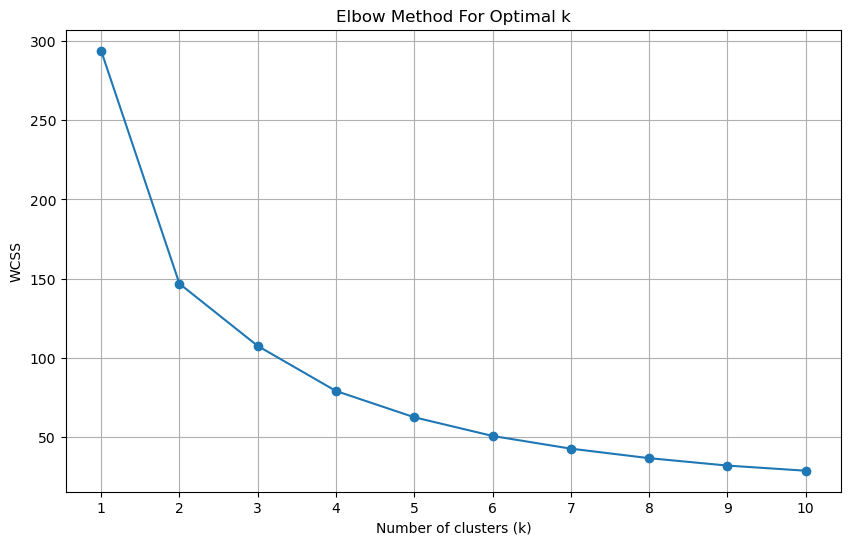

In [5]:
# List to hold the within-cluster sum of squares (WCSS) for each k
wcss = []

# Try different values for k (number of clusters)
for k in range(1, 11):  # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [6]:
# Assuming you found the optimal k to be, for example, 4
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Display the first few rows with cluster labels
print(data.head())


c:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
10        10223               37     100.00                1  3965.66   
21        10361               20      72.55               13  1451.00   
40        10270               21     100.00                9  4905.39   
47        10347               30     100.00                1  3944.70   
51        10391               24     100.00                4  2416.56   

          ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... ADDRESSLINE2  \
10   2/20/2004 0:00  Shipped       1         2     2004  ...      Level 3   
21  12/17/2004 0:00  Shipped       4        12     2004  ...      Level 6   
40   7/19/2004 0:00  Shipped       3         7     2004  ...      Level 6   
47  11/29/2004 0:00  Shipped       4        11     2004  ...      Level 3   
51    3/9/2005 0:00  Shipped       1         3     2005  ...     Level 15   

            CITY     STATE POSTALCODE    COUNTRY TERRITORY CONTACTLASTNAME  \
10     Melbourne  Vi

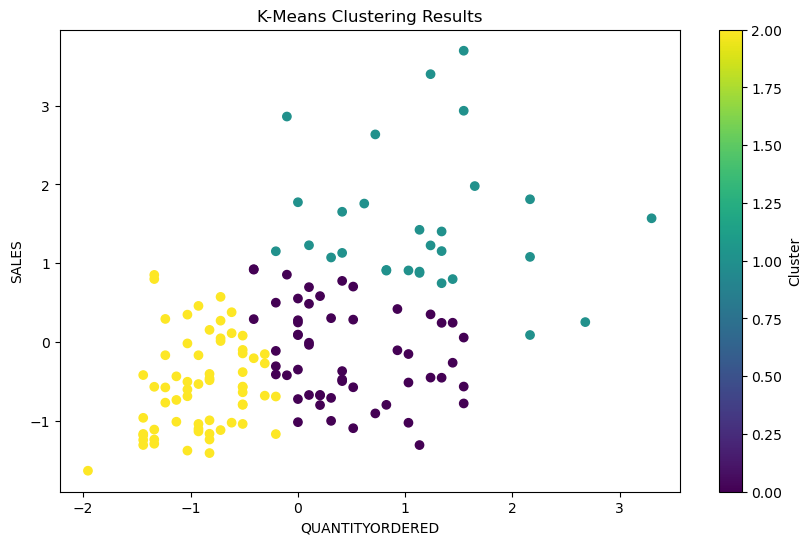

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('K-Means Clustering Results')
plt.xlabel('QUANTITYORDERED')
plt.ylabel('SALES')
plt.colorbar(label='Cluster')
plt.show()


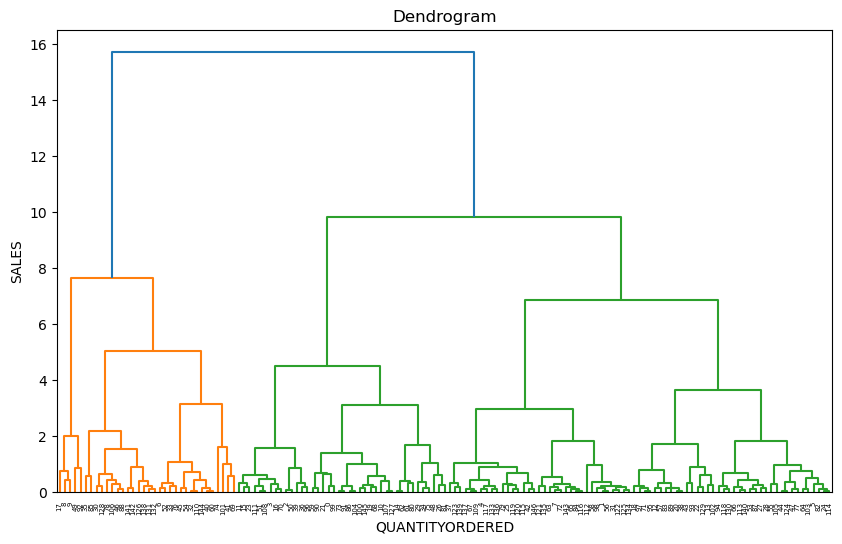

    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
10        10223               37     100.00                1  3965.66   
21        10361               20      72.55               13  1451.00   
40        10270               21     100.00                9  4905.39   
47        10347               30     100.00                1  3944.70   
51        10391               24     100.00                4  2416.56   

          ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...          CITY  \
10   2/20/2004 0:00  Shipped       1         2     2004  ...     Melbourne   
21  12/17/2004 0:00  Shipped       4        12     2004  ...     Chatswood   
40   7/19/2004 0:00  Shipped       3         7     2004  ...     Chatswood   
47  11/29/2004 0:00  Shipped       4        11     2004  ...     Melbourne   
51    3/9/2005 0:00  Shipped       1         3     2005  ...  North Sydney   

       STATE POSTALCODE    COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME  \
10  Victori

In [8]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Create a dendrogram to visualize hierarchical clustering
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title('Dendrogram')
plt.xlabel('QUANTITYORDERED')
plt.ylabel('SALES')
plt.show()

# Apply hierarchical clustering with a specific number of clusters
hc = AgglomerativeClustering(n_clusters=optimal_k)
hc_clusters = hc.fit_predict(scaled_features)

# Add hierarchical cluster labels to the dataset
data['HC_Cluster'] = hc_clusters

# Display the first few rows with hierarchical cluster labels
print(data.head())
